In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("/content/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
df.shape

(30, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [23]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [25]:
data = df.drop('Unnamed: 0',axis=1)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [26]:
data.shape

(30, 2)

In [28]:
data.describe(include="all")

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [29]:
data.nunique()

,0
YearsExperience,28
Salary,30


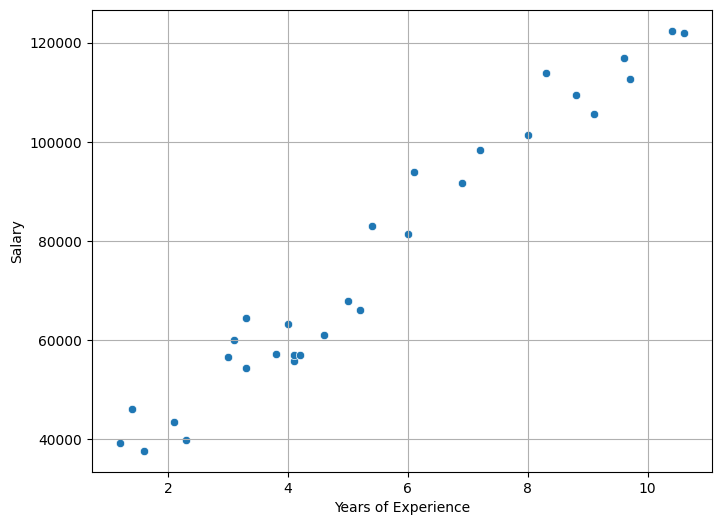

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='YearsExperience',y='Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

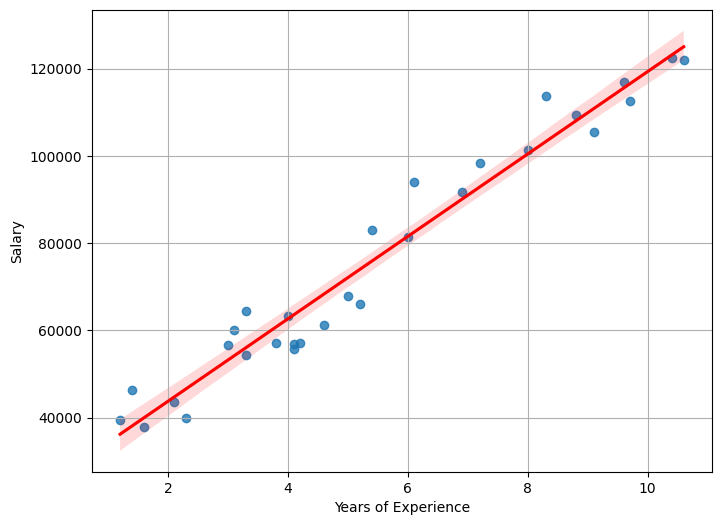

In [37]:
plt.figure(figsize=(8,6))
sns.regplot(data=data,x='YearsExperience',y='Salary', line_kws={'color': 'red'})
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
X = data[['YearsExperience']]
y = data['Salary']

In [58]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [51]:
model = LinearRegression()

In [59]:
model.fit(X_train,y_train)

LinearRegression()

In [60]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [61]:
print(y_test_pred)

[115574.62288352  71680.93878159 102499.90847018  75416.57147111
  55804.4998511   60474.04071301 122111.98009019 107169.44933209
  63275.76523015]


In [62]:
mse = mean_squared_error(y_test,y_test_pred)
r2 = r2_score(y_test,y_test_pred)

In [63]:
print("Mean Squared Error -> ",mse)
print("r2_score -> ",r2)

Mean Squared Error ->  37784662.46621308
r2_score ->  0.9414466227178215


In [67]:
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
combined_results = pd.concat([train_results,test_results])

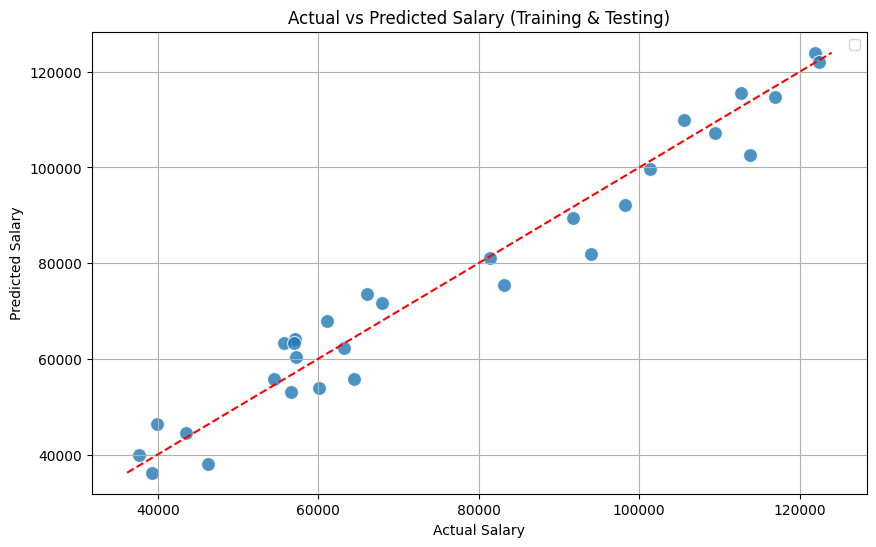

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=combined_results, s=100, alpha=0.8)
plt.plot([min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
         [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1], 'r--')

plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Training & Testing)')
plt.grid(True)
plt.legend()
plt.show()